In [1]:
from gensim.models import LdaModel
import pickle as pkl
import numpy as np
# import matplotlib.colors as mcolors
from nltk.corpus import stopwords
from wordcloud import WordCloud #, STOPWORDS
from matplotlib import pyplot as plt
# import matplotlib.colors as mcolors
# from tqdm import tqdm
# # import pandas as pd
# # import matplotlib.pyplot as plt

In [2]:
# Optimal number of topics
nTopics = 26

In [3]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod': '#DAA520',
 'lawngreen': '#7CFC00',
 'lightcoral': '#F08080',
 'lightpink': '#FFB6C1',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'yellow': '#FFFF00',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32'}

# turn into a list
colorlist = []
for color in custom_colors.values():
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))

# Load Data

In [4]:
# Load model
lda_model = LdaModel.load(f'trained_models/trained_lda_model_final_{nTopics}')

In [5]:
# load cleaned corpus
# with open('data/cleaned_corpus_final.pkl', 'rb') as f:
#     corpus = pkl.load(f)
# with open("data/id2word_final.pkl", 'rb') as f:
#     id2word= pkl.load(f)

In [6]:
# Load topic distributions
topic_distributions = np.load(f'data/topic_distributions_final_{lda_model.num_topics}.npy')

In [7]:
# load raw corpus dataframe
with open('data/raw_corpus_final.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

# Subjective Topic Naming

In [8]:
# look at top key words
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)
topics

[(0,
  [('treatment', 0.028049342),
   ('removal', 0.02489517),
   ('wastewater', 0.017982423),
   ('rate', 0.017019242),
   ('process', 0.016282888),
   ('high', 0.012370342),
   ('reserve', 0.011883955),
   ('reactor', 0.011855434),
   ('right', 0.011792739),
   ('plant', 0.011697778),
   ('system', 0.0110538555),
   ('concentration', 0.010920413),
   ('effluent', 0.010377865),
   ('increase', 0.009732151),
   ('condition', 0.009150902),
   ('efficiency', 0.008591767),
   ('reduction', 0.008073543),
   ('production', 0.007880203),
   ('low', 0.0070898565),
   ('reduce', 0.007014261)]),
 (1,
  [('value', 0.024101092),
   ('distribution', 0.02258609),
   ('parameter', 0.019333357),
   ('datum', 0.017488604),
   ('analysis', 0.015168534),
   ('use', 0.015098168),
   ('base', 0.011990066),
   ('sample', 0.009996006),
   ('index', 0.009679459),
   ('variable', 0.0091412235),
   ('estimation', 0.008787092),
   ('obtain', 0.008475777),
   ('correlation', 0.008439093),
   ('probability', 0.0

In [9]:
# define topic names
topic_names = ['Wastewater Treatment',
               'Stochastic Hydrology',
               'Land Surface',
               'Water Resource Management',
               'Climate Change',
               'Transport & Tracers',
               'Sediment and Erosion',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic ',
               'Topic 26',
              ]

# Create WordClouds and Trend Plots

In [10]:
# calculate time series
years = np.unique(corpus_df['Year'])
topic_distributions_by_year = np.zeros([len(years), lda_model.num_topics])
for y, year in enumerate(years):
    hm_year = topic_distributions[corpus_df['Year'] == year,:]
    topic_distributions_by_year[y,:] = np.sum(hm_year, axis=0) / np.sum(hm_year)

In [11]:
# create wordclouds
stop_words = stopwords.words('english')
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=3500,
                  max_words=15,
                  color_func=lambda *args, **kwargs: colorlist[t],
                  prefer_horizontal=1.0)

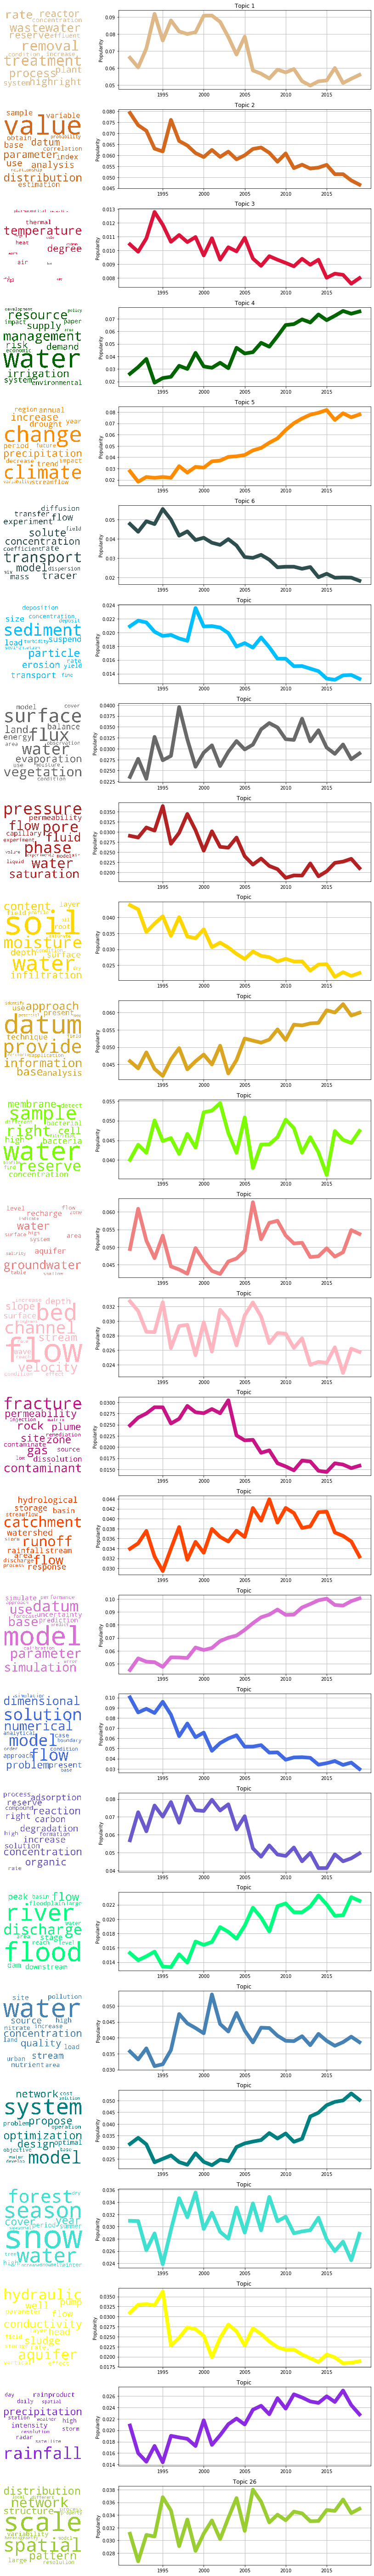

In [24]:
# plot
fig = plt.figure(figsize=(12, 3*nTopics))
gs = fig.add_gridspec(nTopics,3)
for t in range(nTopics):
    
    # plot time series
    ax1 = fig.add_subplot(gs[t, 1:])
    ax1.plot(years, topic_distributions_by_year[:,t], color=list(custom_colors.values())[t], linewidth=8)
    ax1.set_title(topic_names[t])
    ax1.set_xticks(years[4::5])
    ax1.set_ylabel('Popularity')
    ax1.grid()
    
    # plot wordclouds
    ax0 = fig.add_subplot(gs[t, 0])
    topic_words = dict(topics[t][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=1500)
    ax0.imshow(cloud)
    ax0.axis('off')
    
fig.tight_layout()

In [ ]:
# plot relative time series
fig = plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
for i in range(lda_model.num_topics):
    r, g, b = tableau20[i]  
    pltcolor = (r / 255., g / 255., b / 255.)
    plt.plot(years, popularity_all_journals[:,i], 
             color = pltcolor, linewidth=3, label=labels[i])
plt.xlim([1,47])
plt.xticks(years[5::5], fontsize=14)
plt.yticks(fontsize=14)
# plt.xlabel('Year of Publication', fontsize=20)
plt.legend()
plt.ylabel('Popularity', fontsize=20)
plt.title('Relative Popularity of Topics', fontsize=28)
plt.grid()
# plt.savefig(f'figures/all_topics_timeseries_{i}.png')
plt.show()